## Step 1: Install & Import Required Libraries

In [34]:
#Importing core data libraries
import pandas as pd# For loading and working with tabular data (like DataFrames)
import numpy as np# For numerical operations and array manipulations

#TF-IDF and similarity
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text into numerical features
from sklearn.metrics.pairwise import cosine_similarity       # To measure similarity between vectors
from sklearn.decomposition import PCA                        # For reducing feature dimensions (used in plotting)

#Visualization libraries
import matplotlib.pyplot as plt    # For creating plots and visualizations

#Natural Language Toolkit (NLTK) for text processing
import nltk
from nltk.tokenize import word_tokenize                    # To split sentences into individual words
from nltk.corpus import stopwords                          # To remove common stop words like "is", "the", etc.
from nltk.stem import PorterStemmer, WordNetLemmatizer     # To reduce words to their root form

#For handling punctuation
import string

#Suppress unnecessary warning messages
import warnings
warnings.filterwarnings("ignore")

#Utility for wrapping long text for better readability in print
import textwrap

#Statistical tools for language modeling
from collections import defaultdict, Counter               # For efficient counting of unigrams and bigrams
import math                                                # For log and exponential calculations

#Install and import external library used to adjust text labels in plots
!pip install adjustText --quiet                            # Install only if not already available
from adjustText import adjust_text                         # For avoiding label overlap in PCA plots


In [35]:
# Increasing the display size
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)


## Step 2: Download NLTK Resources

In [36]:
# Downloading required libraries
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Step 3: Upload and Load Dataset

In [37]:
# Reading the given input file
from google.colab import files
df = pd.read_csv('/content/IMDB (1).csv')
df.shape


(620, 2)

In [38]:
# Previewing the first 2 reocrds of the input file
df[:2]


,ID,review
0,1,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me..."
1,2,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p..."


## Part I: Bigram Language Model - Sentence Comparison


--- PART I: Bigram Language Model for Sentence Comparison ---
PART I: BIGRAM LANGUAGE MODEL FOR SENTENCE COMPARISON
Training Bigram Language Model...
Vocabulary size: 13567
Total unigrams: 146478
Total bigrams: 146477


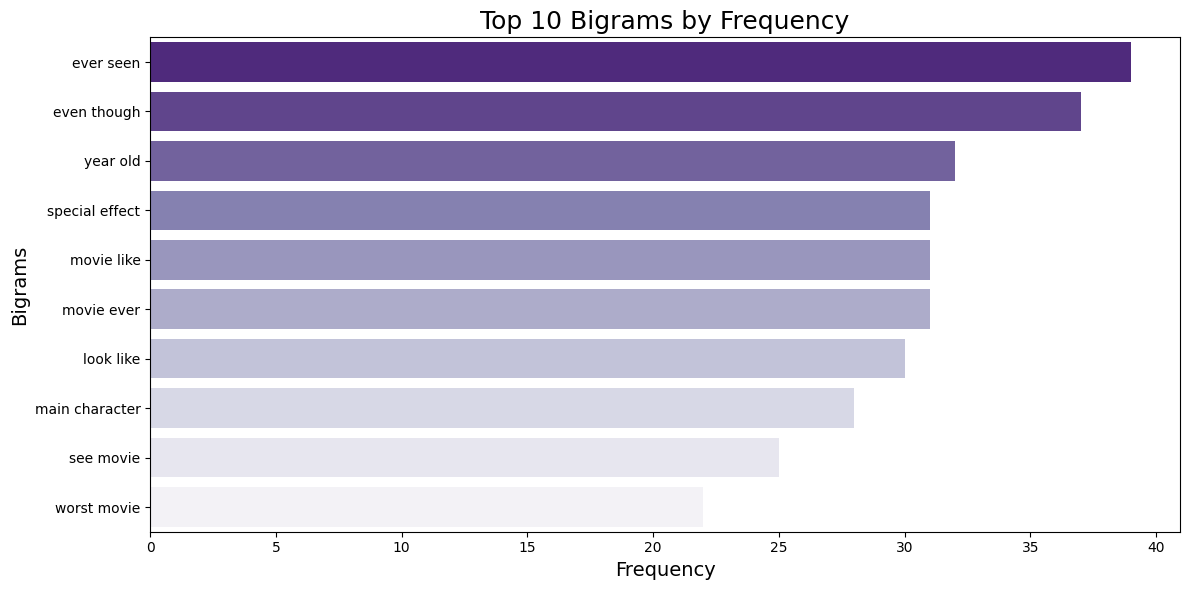

--------------------------------------------------------------------------------
Test Sentence 1: Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch.
Log Probability: -94.6716
Probability: 7.67e-42
--------------------------------------------------------------------------------
Test Sentence 2: I sure would like to see a resurrection of an updated Seahunt series with the tech they have today
Log Probability: -138.0927
Probability: 1.06e-60
--------------------------------------------------------------------------------
Most relevant sentence: Test Sentence 1
Sentence: Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch.

Sentence 1 Score: 7.667194e-42
Sentence 2 Score: 1.064382e-60

Sentence 1 is more relevant to the training corpus.


In [39]:
# --- PART I: Bigram Language Model for Sentence Comparison ---

print("\n--- PART I: Bigram Language Model for Sentence Comparison ---")

# Combine all reviews from the dataset into a single large string
text_data = " ".join(df['review'].dropna().tolist())

# Tokenize the text into words and convert them to lowercase
tokens = word_tokenize(text_data.lower())

# Keep only alphabetic words (remove punctuation, numbers, etc.)
tokens = [token for token in tokens if token.isalpha()]

# Use TF-IDF Vectorizer to extract vocabulary (unique words) from the tokens
vectorizer = TfidfVectorizer()
vectorizer.fit(tokens)  # Build vocabulary from the token list
vocab = vectorizer.get_feature_names_out()

# Print some basic info
print("="*80)
print("PART I: BIGRAM LANGUAGE MODEL FOR SENTENCE COMPARISON")
print("="*80)
print("Training Bigram Language Model...")
print(f"Vocabulary size: {len(vocab)}")  # How many unique words in corpus

# Count how often each word appears (unigrams)
unigram_counts = Counter(tokens)

# Count how often each pair of consecutive words appears (bigrams)
bigram_counts = defaultdict(Counter)
for i in range(len(tokens) - 1):
    bigram_counts[tokens[i]][tokens[i+1]] += 1

# Calculate total number of bigrams
total_bigrams = sum(sum(bigram_counts[word].values()) for word in bigram_counts)

# Print basic statistics
print(f"Total unigrams: {sum(unigram_counts.values())}")
print(f"Total bigrams: {total_bigrams}")

# Define a function to compute the probability of a sentence based on bigrams
def bigram_probability(sentence):
    # Tokenize the sentence and clean it
    sentence = word_tokenize(sentence.lower())
    sentence = [w for w in sentence if w.isalpha()]
    prob = 1  # Initialize probability
    V = len(unigram_counts)  # Vocabulary size for smoothing

    # Multiply bigram probabilities with add-one smoothing
    for i in range(len(sentence) - 1):
        w1, w2 = sentence[i], sentence[i+1]
        count_w1 = unigram_counts[w1]            # Count of word w1
        count_w1_w2 = bigram_counts[w1][w2]      # Count of bigram (w1, w2)
        prob *= (count_w1_w2 + 1) / (count_w1 + V)  # Apply add-1 smoothing
    return prob

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_values, y=bigram_labels, palette='Purples_r')
plt.title("Top 10 Bigrams by Frequency", fontsize=18)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Bigrams", fontsize=14)
plt.tight_layout()
plt.show()

# Define two test sentences for comparison
test_sentence_1 = "Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch."
test_sentence_2 = "I sure would like to see a resurrection of an updated Seahunt series with the tech they have today"

# Compute log-probability for better numerical stability and readability
log_prob_1 = math.log(bigram_probability(test_sentence_1))
log_prob_2 = math.log(bigram_probability(test_sentence_2))

# Display probabilities for sentence 1
print("-" * 80)
print(f"Test Sentence 1: {test_sentence_1}")
print(f"Log Probability: {log_prob_1:.4f}")
print(f"Probability: {math.exp(log_prob_1):.2e}")  # Convert back from log for comparison

# Display probabilities for sentence 2
print("-" * 80)
print(f"Test Sentence 2: {test_sentence_2}")
print(f"Log Probability: {log_prob_2:.4f}")
print(f"Probability: {math.exp(log_prob_2):.2e}")

# Decide which sentence is more likely according to the model
print("-" * 80)
if log_prob_1 > log_prob_2:
    print("Most relevant sentence: Test Sentence 1")
    print(f"Sentence: {test_sentence_1}")
else:
    print("Most relevant sentence: Test Sentence 2")
    print(f"Sentence: {test_sentence_2}")
print("=" * 80)

# Also display raw probabilities for comparison
score1 = bigram_probability(test_sentence_1)
score2 = bigram_probability(test_sentence_2)

print(f"\nSentence 1 Score: {score1:.6e}")
print(f"Sentence 2 Score: {score2:.6e}")

# Final conclusion based on probabilities
if score1 > score2:
    print("\nSentence 1 is more relevant to the training corpus.")
else:
    print("Sentence 2 is more relevant to the training corpus.")


## Part II: Text Preprocessing

In [40]:
print("="*80)
print("\n--- PART II: Preprocessing + TF-IDF + Similarity ---")
print("="*80)
print("Preprocessing corpus...\n")

#Utility function to show the beginning and end of a list of tokens
#This helps keep output concise when printing large lists
def preview_list_format(tokens, head=20, tail=9):
    if len(tokens) <= head + tail:
        return str(tokens)
    preview = tokens[:head] + ['...'] + tokens[-tail:]
    return str(preview)

#Select the first review from the dataset for demonstration
sample_text = df['review'].dropna().values[0]

#Print the original review with nicely wrapped lines for readability
print("\nOriginal Text:\n", textwrap.fill(sample_text, width=100))

# Step 1: Tokenize the sentence (split into individual words and punctuation)
tokens = word_tokenize(sample_text)
print(f"\n1️. Tokenization (total: {len(tokens)}):\n", preview_list_format(tokens))

# Step 2: Convert all tokens to lowercase for uniformity
tokens_lower = [t.lower() for t in tokens]
print(f"\n2️. Lowercasing (total: {len(tokens_lower)}):\n", preview_list_format(tokens_lower))

# Step 3: Remove punctuation and numeric tokens, keep only alphabetic words
tokens_alpha = [t for t in tokens_lower if t.isalpha()]
print(f"\n3️. Remove Punctuation/Numeric Tokens (total: {len(tokens_alpha)}):\n", preview_list_format(tokens_alpha))

# Step 4: Remove stopwords (commonly used words that carry little meaning)
stop_words = set(stopwords.words('english'))  # Load English stopwords
tokens_nostop = [t for t in tokens_alpha if t not in stop_words]
print(f"\n4️. Stopword Removal (total: {len(tokens_nostop)}):\n", preview_list_format(tokens_nostop))

# Step 5: Stem the words to their root form (e.g., "playing" → "play")
stemmer = PorterStemmer()
tokens_stemmed = [stemmer.stem(t) for t in tokens_nostop]
print(f"\n5️. Stemming (total: {len(tokens_stemmed)}):\n", preview_list_format(tokens_stemmed))

# Step 6: Lemmatize the stemmed words to get actual dictionary root forms
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(t) for t in tokens_stemmed]
print(f"\n6️. Lemmatization (total: {len(tokens_lemmatized)}):\n", preview_list_format(tokens_lemmatized))

#Define a function that applies the above preprocessing steps to any input text
def preprocess(text):
    tokens = word_tokenize(text.lower())                    # Tokenize and lowercase
    tokens = [t for t in tokens if t.isalpha()]             # Keep alphabetic words only
    tokens = [t for t in tokens if t not in stop_words]     # Remove stopwords
    tokens = [stemmer.stem(t) for t in tokens]              # Apply stemming
    tokens = [lemmatizer.lemmatize(t) for t in tokens]      # Apply lemmatization
    return " ".join(tokens)                                 # Reconstruct cleaned text

#Apply the preprocessing to the full dataset column 'review' and store in new column
df['cleaned_review'] = df['review'].astype(str).apply(preprocess)



--- PART II: Preprocessing + TF-IDF + Similarity ---
Preprocessing corpus...


Original Text:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.
They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me
about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO.
Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards
to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called
OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly
on Emerald City, an experimental section of the prison where all the cells have glass fronts and
face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims,
gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings
and shady agr

# Word Cloud

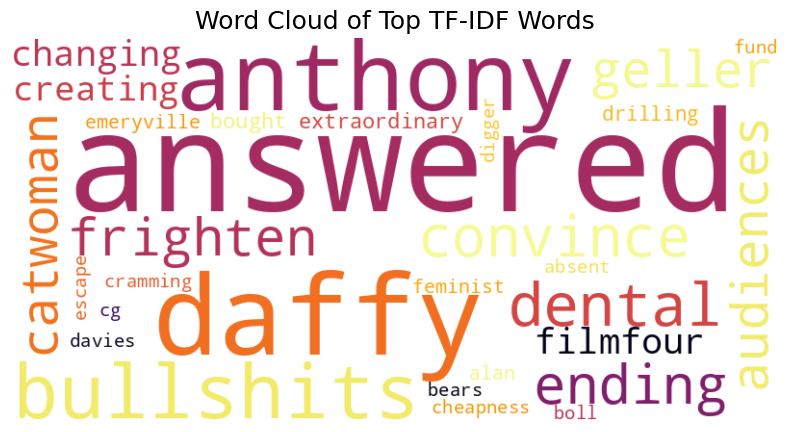

In [41]:
from wordcloud import WordCloud
word_scores = {vocab[i]: avg_tfidf[i] for i in top_indices}
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate_from_frequencies(word_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top TF-IDF Words", fontsize=18)
plt.show()

## TF-IDF Vectorization and Similarity Analysis

In [42]:
#Step 1: Initialize the TF-IDF vectorizer
# TF-IDF (Term Frequency–Inverse Document Frequency) helps quantify how important a word is in a document.
vectorizer = TfidfVectorizer(
    max_features=5000,      # Keep only the top 5000 most informative words
    min_df=2,               # Ignore words that appear in less than 2 reviews
    max_df=0.95,            # Ignore very common words that appear in more than 95% of reviews
    ngram_range=(1, 2)      # Use single words (unigrams) and pairs of words (bigrams)
)

#Step 2: Apply the vectorizer to the preprocessed text
# This converts each review into a vector of TF-IDF values
X_tfidf = vectorizer.fit_transform(df['cleaned_review'])

#Step 3: Get the list of all words (vocabulary) identified by the vectorizer
vocab = vectorizer.get_feature_names_out()

#Step 4: Transpose the matrix so each row corresponds to a word
# Now we can compare word vectors instead of review vectors
tfidf_matrix = X_tfidf.T.toarray()

#Step 5: Compute cosine similarity between all word vectors
# This gives us how similar each word is to every other word in context of usage
similarity_matrix = cosine_similarity(tfidf_matrix)

#Summary and stats
print("=" * 80)
print("FEATURE EXTRACTION AND SIMILARITY ANALYSIS")
print("=" * 80)
print("Extracting TF-IDF features...")
print(f"Feature matrix shape: {X_tfidf.shape}")       # (number of reviews, number of features/words)
print(f"Number of features: {X_tfidf.shape[1]}")      # Total words used after filtering

#Step 6: Compare all word pairs and store their similarity score
similarities = []
for i in range(len(vocab)):
    for j in range(i + 1, len(vocab)):  # Avoid redundant comparisons
        sim = similarity_matrix[i][j]
        similarities.append((vocab[i], vocab[j], sim))

#tep 7: Sort the word pairs by similarity score in descending order
similarities = sorted(similarities, key=lambda x: x[2], reverse=True)

#Step 8: Print top 10 most similar word pairs based on TF-IDF context
print("Top 10 most similar word pairs:")
for i, (w1, w2, sim) in enumerate(similarities[:10]):
    print(f"{i+1}. '{w1}' - '{w2}': {sim:.4f}")


FEATURE EXTRACTION AND SIMILARITY ANALYSIS
Extracting TF-IDF features...
Feature matrix shape: (620, 5000)
Number of features: 5000
Top 10 most similar word pairs:
1. 'be' - 'human be': 1.0000
2. 'br eye' - 'eye candi': 1.0000
3. 'clint eastwood' - 'eastwood': 1.0000
4. 'durbin' - 'ray milland': 1.0000
5. 'liner' - 'one liner': 1.0000
6. 'ann ramsey' - 'momma train': 1.0000
7. 'ann ramsey' - 'ramsey': 1.0000
8. 'balloon' - 'hot air': 1.0000
9. 'buster' - 'buster keaton': 1.0000
10. 'femm' - 'femm fatal': 1.0000


## PCA Visualization of Top 30 TF-IDF Words


Plotting PCA for Top 30 Most Important Words (by TF-IDF score)...


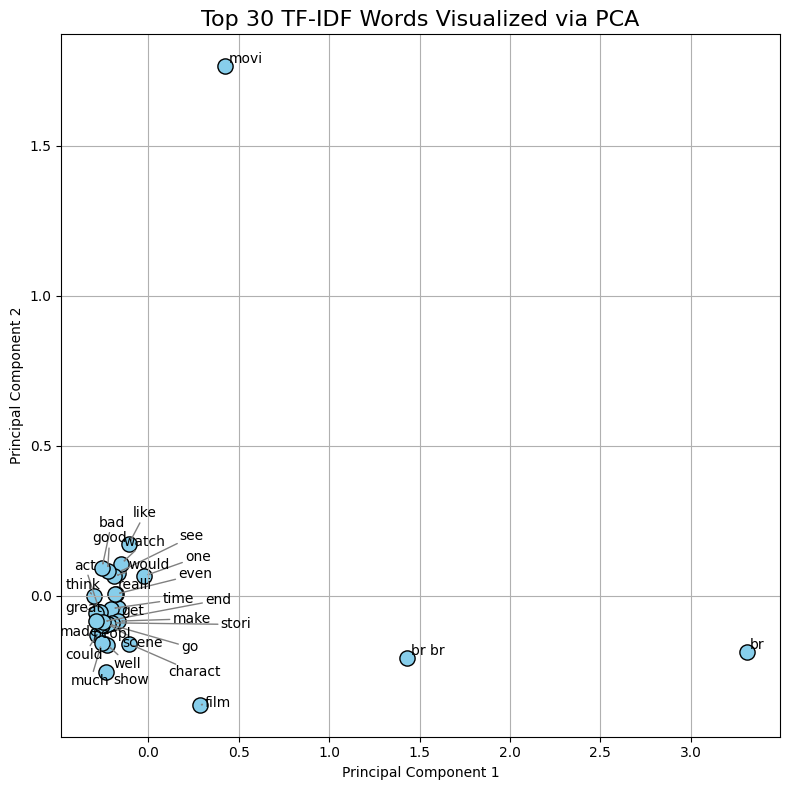

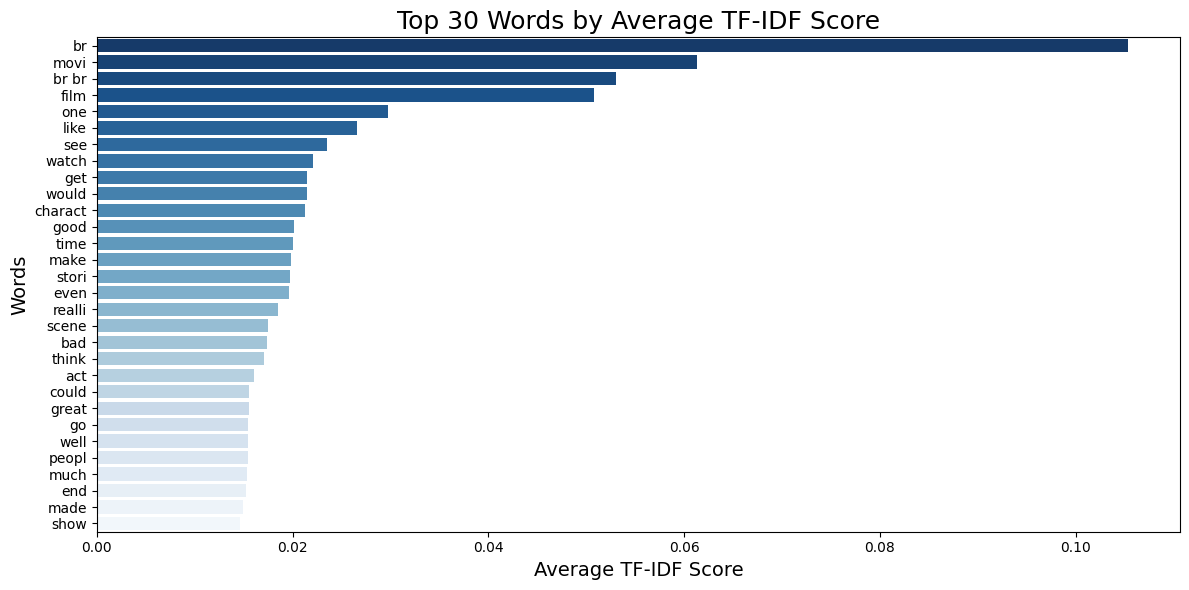

In [43]:
#Notify that PCA plot generation is starting
print("\nPlotting PCA for Top 30 Most Important Words (by TF-IDF score)...")

# Step 1️: Compute average TF-IDF score for each word across all documents
avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).ravel()

# Step 2️: Select the top 30 words with the highest average TF-IDF scores
top_n = 30
top_indices = avg_tfidf.argsort()[::-1][:top_n]  # Sort indices in descending order
selected_words = [vocab[i] for i in top_indices]  # Get corresponding word list
selected_vectors = tfidf_matrix[top_indices]      # Get corresponding TF-IDF vectors

# Step 3️: Apply PCA to reduce TF-IDF vectors from high-dimension to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(selected_vectors)  # Each word now has 2 coordinates

# Step 4️: Create a scatter plot of these 2D points
plt.figure(figsize=(8, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], color='skyblue', edgecolor='k', s=120)

# Step 5️: Add labels (words) next to each point
texts = []
for i, word in enumerate(selected_words):
    texts.append(plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=10))

# Step 6️: Adjust text labels to prevent overlap and add arrows if needed
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

# Step 7️: Final touches – titles, labels, and layout
plt.title("Top 30 TF-IDF Words Visualized via PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x=avg_tfidf[top_indices], y=selected_words, palette='Blues_r')
plt.title("Top 30 Words by Average TF-IDF Score", fontsize=18)
plt.xlabel("Average TF-IDF Score", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.tight_layout()
plt.show()
